# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [11]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [16]:
# data rename
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()

#find missing data and drop them, grade-4-math
np.NaN
type(np.NaN)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

#fill in the data
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [15]:
df.describe()
#with min=1990 and max =2019, so 29 years of data are logged in our dataset

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,565.000000,4.910000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,3.980000e+02,...,491.000000,491.000000,491.000000,3.980000e+02,4.490000e+02,4.910000e+02,565.000000,564.000000,521.000000,478.000000
mean,2008.653097,9.455694e+05,1.021679e+07,9.105977e+05,4.717920e+06,4.588268e+06,1.032646e+07,5.345064e+06,3.015816e+06,4.874543e+05,...,72460.873727,72431.075356,64304.798371,5.810083e+05,2.878254e+05,9.647332e+05,236.327434,279.310284,219.796545,263.870293
std,7.413808,1.109701e+06,1.285581e+07,1.297155e+06,6.045521e+06,5.987918e+06,1.310309e+07,6.881358e+06,3.657841e+06,5.869066e+05,...,85064.551144,84302.796730,76243.626074,6.854742e+05,3.408781e+05,1.131442e+06,9.285505,9.518487,6.962321,6.513002
min,1990.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.310700e+04,...,4643.000000,3371.000000,2785.000000,3.769800e+04,1.378100e+04,6.892500e+04,192.000000,235.000000,188.000000,238.000000
25%,2005.000000,2.795105e+05,2.600654e+06,2.342685e+05,1.341450e+06,8.735868e+05,2.520274e+06,1.355798e+06,7.700552e+05,1.290740e+05,...,20499.500000,20926.500000,18536.500000,1.658642e+05,8.157100e+04,2.810865e+05,232.000000,274.000000,216.000000,260.000000
50%,2009.000000,6.667800e+05,5.721013e+06,5.277240e+05,2.906463e+06,2.321530e+06,5.773808e+06,2.976032e+06,1.724142e+06,3.379880e+05,...,50918.000000,49993.000000,41118.000000,4.037075e+05,1.871180e+05,6.774110e+05,238.000000,281.000000,221.000000,265.000000
75%,2015.000000,1.033256e+06,1.166697e+07,1.007900e+06,5.880226e+06,5.228991e+06,1.139698e+07,5.989623e+06,3.474660e+06,5.654545e+05,...,81431.000000,81367.000000,76096.500000,6.452258e+05,3.291480e+05,1.079075e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [27]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].mean()
#Ohio has a higher average outcome score across all years

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your outcome score across all states in 2019

In [28]:
df.groupby("YEAR")["AVG_MATH_4_SCORE"].mean()
#average across all states for average math 4 score is about 239.547

YEAR
1990    213.000000
1992    218.418605
1996    224.000000
2000    223.976744
2003    234.000000
2005    237.169811
2007    239.207547
2009    239.547170
2011    240.490566
2013    241.962264
2015    240.415094
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [30]:
df.groupby('STATE')["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Text(0.5, 1.0, '4th Grade MATH Score Over Time')

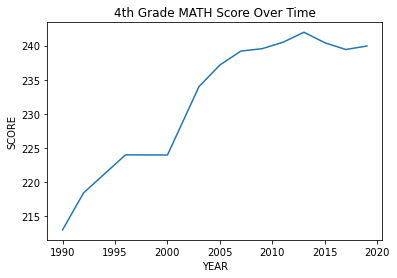

In [33]:
#total distribution of 4th grade maths scores
#df.AVG_READING_8_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

#scatter plot based on years
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade MATH Score Over Time')

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='AVG_MATH_4_SCORE', ylabel='AVG_READING_4_SCORE'>

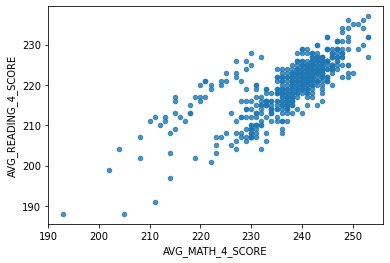

In [38]:
#df.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_4_SCORE', alpha=0.6)
#plt.xlabel('State Revenue')
#plt.ylabel('4th Grade MATH Score') weak to none correlation
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.8) 
#strong correlation between average 4th grade math score and average 4th grade reading score

**<4th Grade Math Score VS 4th Grade Reading Score>**

**Visualization 2**

<AxesSubplot:xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

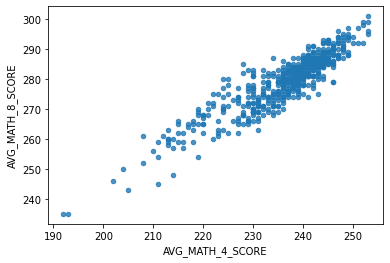

In [37]:
#df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
#plt.xlabel('Instruction Expenditure')
#plt.ylabel('4th Grade MATH Score') weak correlation
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
#average math 4 score has a strong correlation with average math-8 score

**<4th Grade Math Score VS 8th Grade Math Score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [4]:
from sklearn.model_selection import train_test_split

In [33]:
 X =df[['ENROLL_4','AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
 y =df.loc[X.index]['AVG_MATH_8_SCORE']

#make sure there's no NaN in y
 y.fillna(y.mean(), inplace=True)

In [34]:
 #X_train, X_test, y_train, y_test = train_test_split(
     # X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [19]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [35]:
# create your model here
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [38]:
#print(model.intercept_)
#print(model.coef_)

#R^2 value describes how well a linear model fits the data
model.score(X_test, y_test)

# mean error
#np.mean(model.predict(X_test)-y_test)

0.8731965601106264

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

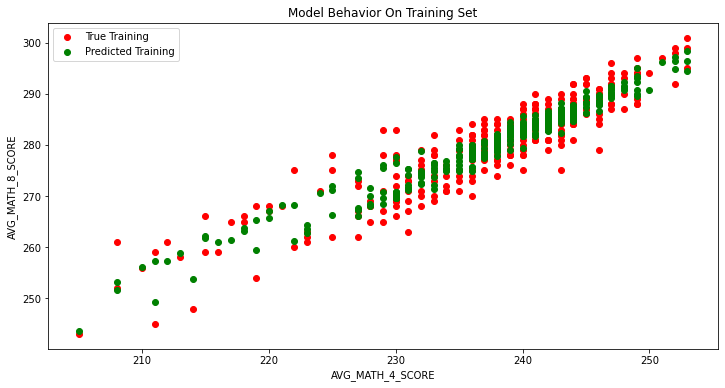

In [39]:
 col_name = 'AVG_MATH_4_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('AVG_MATH_8_SCORE')
 plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

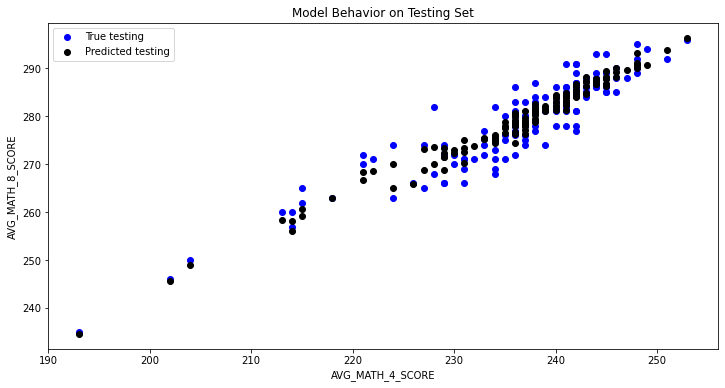

In [40]:
 col_name = 'AVG_MATH_4_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('AVG_MATH_8_SCORE')
 plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<In this project, I followed the tutorial and wanted to find out the relationship between 4th grade math score, 4th grade reading score, and how it is related to 8th grade math score. 4th grade reading score has a strong positive correlation with 4th grade math score. 4th grade math score has a strong positive correlation with 8th grade math score. After the evaluation part, my model works well on the training set and testing set, which shows there's a indication that good performance on 4th grade math+reading will predict good performance on 8th grade math score.  >**